# Caso de estudio 3: Optimización de la producción en una fábrica

Imagina que diriges una fábrica que produce varios productos, y cada producto tiene una demanda, un costo de producción y un precio de venta. Tu objetivo es maximizar el beneficio total, respetando las restricciones de capacidad de la fábrica y la demanda de cada producto.

### Información con la que cuentas:
- **Demanda**: Número máximo de unidades que se pueden vender de cada producto.
- **Costo de producción**: Costo de producir una unidad de cada producto.
- **Precio de venta**: Ingreso por vender una unidad de cada producto.
- **Capacidad de producción**: Número máximo de unidades que la fábrica puede producir en total.

El objetivo es determinar cuántas unidades de cada producto deben producirse para maximizar el beneficio total.

### Representación de las soluciones

- Cada solución se va a representar como una lista de números enteros que indica la cantidad de cada producto a producir.
- Por ejemplo, `[10, 5, 3]` significa que se producen 10 unidades del producto 1, 5 unidades del producto 2, y 3 unidades del producto 3.




In [ ]:
# Importación de bibliotecas
import random
import numpy as np
import matplotlib.pyplot as plt

## Parámetros del Problema

Definimos los parámetros del problema: demanda, costos, precios y capacidad de la fábrica.


In [ ]:
demanda = [30, 45, 30]  # Demanda máxima de cada producto
costos = [4, 6, 8]      # Costo de producción por unidad de cada producto
precios = [10, 14, 20]  # Precio de venta por unidad de cada producto
capacidad = 100          # Capacidad total de producción de la fábrica


## Función de aptitud

Calculamos el beneficio total de una solución y penalizamos aquellas que exceden la capacidad de producción.

In [ ]:
def calcular_aptitud(solucion, demanda, costos, precios, capacidad):
    produccion_total = sum(solucion)
    if produccion_total > capacidad:
        return 0  # Penalización si se excede la capacidad

    beneficio = sum((precios[i] - costos[i]) * min(solucion[i], demanda[i]) for i in range(len(solucion)))
    return beneficio

# Por ejemplo:
solucion = [10, 5, 3]
print(f"Aptitud: {calcular_aptitud(solucion, demanda, costos, precios, capacidad)}")


Aptitud: 136


## Actividad 1:
- Agrega una segunda versión de la función de aptitud para que la penalización se realice con un factor multiplicativo $\lambda$, como vimos en la clase.
- Evalúa cómo afecta esto en la solución del problema de optimización, ¿Qué función de aptitud tuvo mejores resultados?

## Inicialización de la población

Generamos una población inicial de posibles soluciones aleatorias.


In [ ]:
def generar_poblacion(tamano_poblacion, num_productos, demanda):
    poblacion = np.random.randint(demanda, size=(tamano_poblacion, num_productos))
    return poblacion

# Por ejemplo:
poblacion_inicial = generar_poblacion(10, len(demanda), demanda)
print(poblacion_inicial)

[[27 37 29]
 [12 19 17]
 [25 38  8]
 [ 2 21  3]
 [24  1  9]
 [ 7 34  7]
 [ 0  7  4]
 [10 18 20]
 [ 2 15 13]
 [16 28  7]]


## Selección: Ruleta

Seleccionamos soluciones probabilísticamente según su aptitud.


In [ ]:
# Selección de padres
def seleccion(poblacion, aptitudes):
    total_aptitud = np.sum(aptitudes)

    # Evitar división por cero si todas las aptitudes son cero
    if total_aptitud == 0:
        probabilidades = np.ones(len(poblacion)) / len(poblacion)
    else:
        probabilidades = aptitudes / total_aptitud

    # Selecciona dos individuos con probabilidad proporcional a su aptitud
    indices = np.random.choice(len(poblacion), size=2, p=probabilidades)
    return [poblacion[i] for i in indices] # Return a list of selected individuals


aptitudes = [calcular_aptitud(sol, demanda, costos, precios, capacidad) for sol in poblacion_inicial]
padres = seleccion(poblacion_inicial, aptitudes)
print(f"Padres seleccionados: {padres}")


Padres seleccionados: [array([ 2, 15, 13]), array([10, 18, 20])]


### Operador de cruce: cruce de un punto

Elegimos un punto de cruce y combinamos dos soluciones para crear dos nuevas.


In [ ]:
def cruce_punto_unico(padre1, padre2):
    punto_cruce = np.random.randint(1, len(padre1))
    hijo1 = np.concatenate((padre1[:punto_cruce], padre2[punto_cruce:]))
    hijo2 = np.concatenate((padre2[:punto_cruce], padre1[punto_cruce:]))
    return hijo1, hijo2

padre1 = [10, 5, 3]
padre2 = [3, 8, 15]
hijo1, hijo2 = cruce_punto_unico(padre1, padre2)
print(f"Hijo 1: {hijo1}")
print(f"Hijo 2: {hijo2}")


Hijo 1: [10  8 15]
Hijo 2: [3 5 3]


## Operador de mutación: mutación de desplazamiento

Modificamos la cantidad de un producto.


In [ ]:
def mutacion_creep(solucion, demanda, creep=2):
    idx = np.random.randint(0, len(solucion) - 1)
    solucion[idx] += np.random.choice([-1, 1])*creep
    return np.clip(solucion, a_min=0, a_max=None)

# mutacion de reajuste aleatorio

solucion = [10, 5, 3]
print(f"Solución antes de mutación: {solucion}")
solucion_mutada = mutacion_creep(solucion, demanda)
print(f"Solución después de mutación: {solucion_mutada}")


Solución antes de mutación: [10, 5, 3]
Solución después de mutación: [10  7  3]


## Actividad 2:
- Implementa la mutación por reajuste aleatorio y compara los resultados al aplicar cada una sobre el algoritmo. ¿Qué mutación tuvo mejores resultados?

## Algoritmo Genético Completo

In [ ]:
def algoritmo_genetico(num_generaciones, tamano_poblacion, demanda, costos, precios, capacidad):
    poblacion = generar_poblacion(tamano_poblacion, len(demanda), demanda)
    for generacion in range(num_generaciones):
        nueva_poblacion = []

        aptitudes = [calcular_aptitud(sol, demanda, costos, precios, capacidad) for sol in poblacion]

        for _ in range(tamano_poblacion // 2):
            padres = seleccion(poblacion, aptitudes)
            hijo1, hijo2 = cruce_punto_unico(padres[0], padres[1])
            nueva_poblacion.append(mutacion_creep(hijo1, demanda))
            nueva_poblacion.append(mutacion_creep(hijo2, demanda))
        # Reemplazo parcial: seleccionar la mitad mejor de la población actual
        mitad_poblacion_actual = np.argsort(aptitudes)[::-1][:tamano_poblacion // 2]
        poblacion = np.concatenate((poblacion[mitad_poblacion_actual],
                                   nueva_poblacion))

        mejor_individuo = poblacion[np.argmax([calcular_aptitud(sol, demanda, costos, precios, capacidad) for sol in poblacion])]
        mejor_aptitud = calcular_aptitud(mejor_individuo, demanda, costos, precios, capacidad)
        print(f'Generación {generacion + 1}: Mejor aptitud = {mejor_aptitud}')

    return mejor_individuo

mejor_solucion = algoritmo_genetico(num_generaciones=50, tamano_poblacion=10, demanda=demanda, costos=costos, precios=precios, capacidad=capacidad)
print(f"Mejor solución: {mejor_solucion}")


Generación 1: Mejor aptitud = 666
Generación 2: Mejor aptitud = 666
Generación 3: Mejor aptitud = 804
Generación 4: Mejor aptitud = 804
Generación 5: Mejor aptitud = 820
Mejor solución: [33 41 26]


### Actividad 3:
- Experimenta con el número de generaciones y el tamaño de la población. ¿Cómo afectan estos parámetros a la solución final?


Finalmente, visualizamos la cantidad óptima de producción de cada producto.


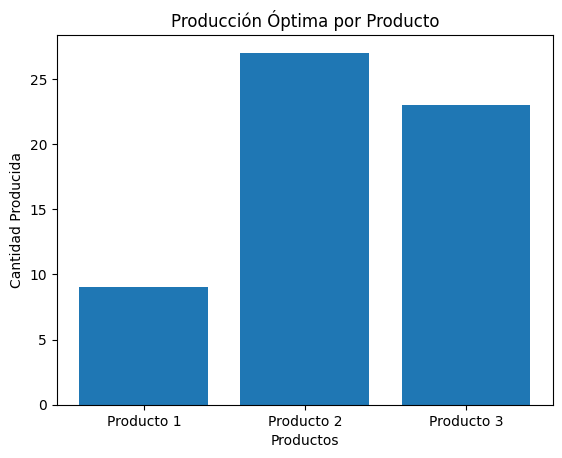

In [ ]:
import matplotlib.pyplot as plt

productos = ['Producto 1', 'Producto 2', 'Producto 3']
plt.bar(productos, mejor_solucion)
plt.title('Producción Óptima por Producto')
plt.xlabel('Productos')
plt.ylabel('Cantidad Producida')
plt.show()
